<a href="https://colab.research.google.com/github/AhmdKlmi22/Multilable_Tugas3_DeepLearning/blob/main/Another_copy_of_Multilabel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install -q kaggle

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [43]:
import os
os.environ["KAGGLE_USERNAME"] = "resparda" # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "86fcbfea8d2a6669e89d3998ba7c65bd" # Ganti dengan key yang ada di kaggle.json

In [44]:
!kaggle datasets download -d resparda/multilable-4-class-object-detection -p ./dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/resparda/multilable-4-class-object-detection
License(s): unknown


In [45]:
!ls /content/dataset

Datasetmultilabel_AhmadKalami_202255202023
traindataset_AhmadSudrajatDaniKalami_202255202023.csv


In [46]:
#Now let us read metadata to get our Y values (multiple lables)
df = pd.read_csv('/content/dataset/traindataset_AhmadSudrajatDaniKalami_202255202023.csv')
print(df.head())     # printing first five rows of the file
print(df.columns)

df = df.iloc[:2000]  #Loading only first 1000 datapoints for memory reasons
#Need to read images using the tag from metadata.
#Otherwise, if read directly from the folder then images may not correspond to
#the metadata from the csv file.

          ID                                              Objek  FIGUREANIME  \
0  Gambar001  ['FIGUREANIME','ROKOKELEKTRIK','DOMPET','MOUSE...            0   
1  Gambar002  ['FIGUREANIME','ROKOKELEKTRIK','DOMPET','MOUSE...            0   
2  Gambar003  ['FIGUREANIME','ROKOKELEKTRIK','DOMPET','MOUSE...            0   
3  Gambar004  ['FIGUREANIME','ROKOKELEKTRIK','DOMPET','MOUSE...            0   
4  Gambar005  ['FIGUREANIME','ROKOKELEKTRIK','DOMPET','MOUSE...            0   

   ROKOKELEKTRIK  DOMPET  MOUSEGAMING;  
0              0       1             0  
1              0       1             0  
2              0       1             0  
3              0       1             0  
4              0       1             0  
Index(['ID', 'Objek', 'FIGUREANIME', 'ROKOKELEKTRIK', 'DOMPET',
       'MOUSEGAMING;'],
      dtype='object')


In [47]:
import os

SIZE = 224
X_dataset = []

# Pastikan folder ini benar dan sesuai dengan hasil ekstrak
image_directory = '/content/dataset/Datasetmultilabel_AhmadKalami_202255202023/Datasetmultilabel_AhmadKalami_202255202023'

for i in tqdm(range(df.shape[0])):
    img_path = os.path.join(image_directory, df['ID'][i] + '.jpg')

    if not os.path.exists(img_path):
        print(f"[WARNING] File not found: {img_path}")
        continue  # skip file yang tidak ditemukan

    img = image.load_img(img_path, target_size=(SIZE, SIZE, 3))
    img = image.img_to_array(img)
    img = img / 255.
    X_dataset.append(img)

X = np.array(X_dataset)


100%|██████████| 400/400 [00:43<00:00,  9.10it/s]


In [48]:
#
print(df['ID'][300])  #King Kong


Gambar301


In [49]:
print(df['Objek'][300])  #Tagged as multiple Genres.

['FIGUREANIME','ROKOKELEKTRIK','DOMPET','MOUSEGAMING']


In [50]:
#Id and Genre are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df.drop(['ID', 'Objek'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [51]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins.

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat).

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 220, 220, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 106, 106, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 53, 53, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 49, 49, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 20, 20, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 996,324 (3.80 MB)

 Trainable params: 995,972 (3.80 MB)

 Non-trainable params: 352 (1.38 KB)

In [52]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [53]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2918 - loss: 1.0896 - val_accuracy: 0.2000 - val_loss: 0.6755
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3791 - loss: 0.7939 - val_accuracy: 0.2083 - val_loss: 0.7331
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4064 - loss: 0.6074 - val_accuracy: 0.2083 - val_loss: 0.8210
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.3995 - loss: 0.6368 - val_accuracy: 0.2083 - val_loss: 0.8266
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3894 - loss: 0.4659 - val_accuracy: 0.2083 - val_loss: 0.8353
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3735 - loss: 0.4596 - val_accuracy: 0.2083 - val_loss: 1.0774
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4264 - loss: 0.4244 - val_accuracy: 0.2083 - val_loss: 1.0021
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4596 - loss: 0.4161 - val_accuracy: 0.2167 - val_loss: 

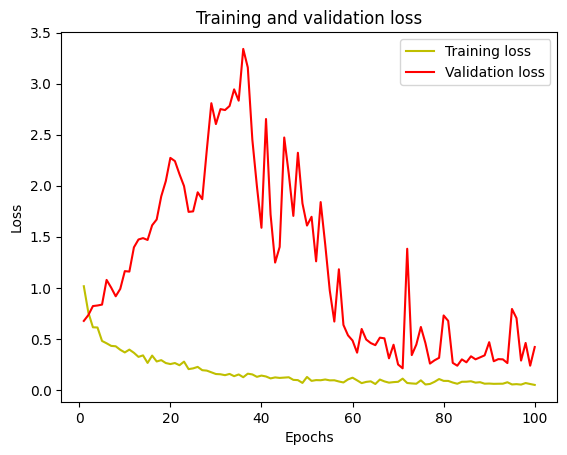

In [54]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

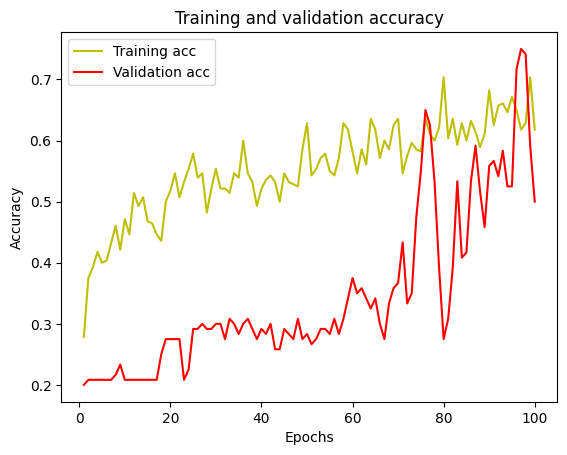

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


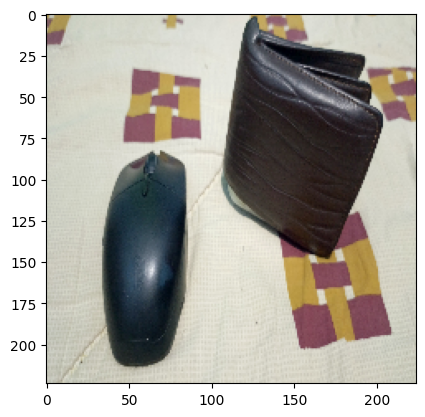

In [70]:
#Validate on an image
#img = image.load_img('/content/Multi_Label_dataset/Images/tt0085318.jpg', target_size=(SIZE,SIZE,3))
# Assuming 'ddlj.jpg' is in '/content/Multi_Label_dataset/Images/'
img = image.load_img('/content/dataset/Datasetmultilabel_AhmadKalami_202255202023/Datasetmultilabel_AhmadKalami_202255202023/Gambar142.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

In [71]:
top_k = min(10, len(proba[0]))  # cetak maksimal 10, atau sebanyak mungkin jika label < 10
for i in range(top_k):
    print("{}".format(classes[sorted_categories[i]]) + " ({:.3f})".format(proba[0][sorted_categories[i]]))


MOUSEGAMING; (1.000)
DOMPET (1.000)
FIGUREANIME (0.000)
ROKOKELEKTRIK (0.000)


In [72]:
###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4917 - loss: 0.4734
Accuracy =  50.0 %


In [73]:
# prompt: berikan code evaluasi model

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (e.g., using a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))


# Calculate and print the confusion matrix (optional)
# Note: Confusion matrices are best visualized for binary or few-class problems
# For multi-label, confusion matrix for each label is more informative
for i in range(len(classes)):
  print(f"Confusion Matrix for {classes[i]}:")
  print(confusion_matrix(y_test[:,i], y_pred_classes[:,i]))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
               precision    recall  f1-score   support

  FIGUREANIME       1.00      0.89      0.94        74
ROKOKELEKTRIK       0.98      0.81      0.89        77
       DOMPET       0.88      0.96      0.92        74
 MOUSEGAMING;       0.88      0.97      0.92        72

    micro avg       0.93      0.91      0.92       297
    macro avg       0.93      0.91      0.92       297
 weighted avg       0.93      0.91      0.92       297
  samples avg       0.90      0.89      0.89       297

Confusion Matrix for FIGUREANIME:
[[46  0]
 [ 8 66]]
Confusion Matrix for ROKOKELEKTRIK:
[[42  1]
 [15 62]]
Confusion Matrix for DOMPET:
[[36 10]
 [ 3 71]]
Confusion Matrix for MOUSEGAMING;:
[[38 10]
 [ 2 70]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
